<a href="https://colab.research.google.com/github/daniyalcr9/DS-A_CEP/blob/main/Spam_Email_Detection(20sw107%2C_20sw083%2C_20sw119)%20updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://helpemailmarketing.com/wp-content/uploads/2019/12/spam-filter-34101a1e6c494d44aa1b6d10302537da.jpg"  style='width:1000px'>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv('/content/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Dropped The Column Unnamed: 0**

In [ ]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [ ]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

**Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian)
Here I use Multinominal Bayes Because here data in a discrete form
discrete data(e.g movie ratings ranging  1 to 5 as each rating will have certain frequency to represent)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

# Tarining The Model

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

**Here I given Two email Two detect 1st One is looking good and the other one looking spam**

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES',
    'Congratulations you won 50 tola gold through benzair income support programme',
    'be there in 5 mins'
]

**Predict Email**

In [ ]:
clf.predict(emails)

array([0, 1, 1, 0])

# Prediction Of Model

In [ ]:
clf.score(X_test,y_test)

0.9885139985642498

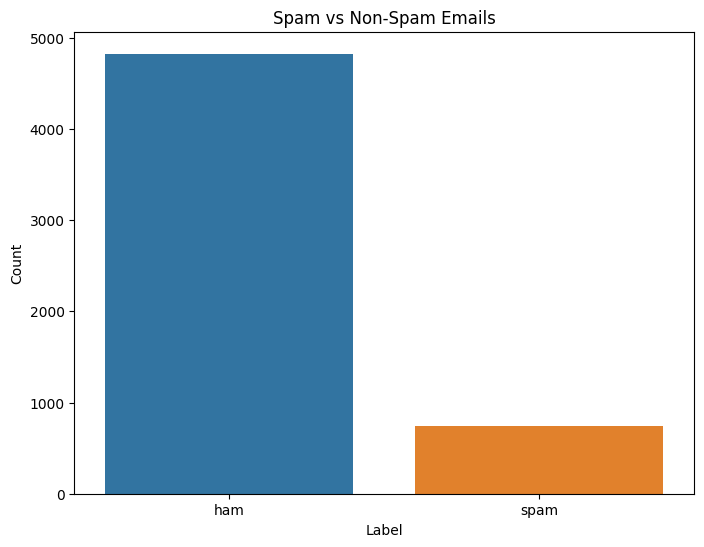

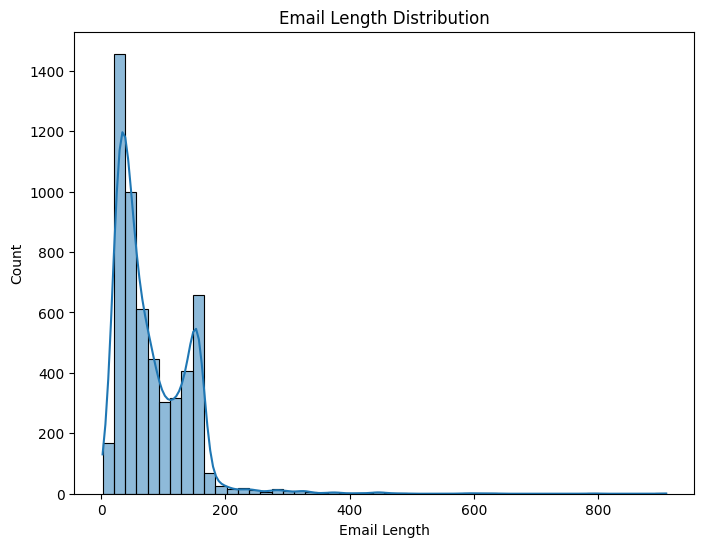

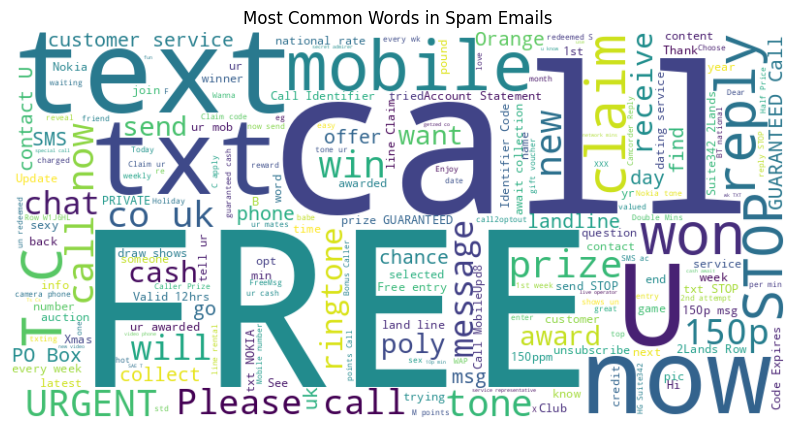

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



# Visualize the distribution of spam vs non-spam emails using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=data)
plt.title('Spam vs Non-Spam Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualize the length of emails (assuming 'email_text' is the column containing email text)
data['email_length'] = data['Message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data['email_length'], bins=50, kde=True)
plt.title('Email Length Distribution')
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.show()

# Visualize the most common words in spam emails (assuming 'email_text' is the column containing email text)
spam_text = ' '.join(data[data['Category'] == 'spam']['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Emails')
plt.show()